In [1]:
import os
import cv2
from meter_digits_recognizer import MeterDigitsRecognizer
import matplotlib.pylab as plt

## List of image files to use in the example

In [2]:
images_dir = "images"
img_filenames = [
    "0/1_hot_water_meter_20210212_065239.jpg",
    "1/1_cold_water_meter_20210210_215613.jpg",
    "2/6_cold_water_meter_20210307_221149.jpg",
    "3/6_cold_water_meter_20210210_121529.jpg",
    "4/6_cold_water_meter_20210212_123308.jpg",
    "5/7_cold_water_meter_20210128_013005.jpg",
    "6/6_cold_water_meter_20210210_134531.jpg",
    "7/6_cold_water_meter_20210209_202508.jpg",
    "8/6_cold_water_meter_20210209_080446.jpg",
    "9/5_cold_water_meter_20210209_100446.jpg",
    "10/7_cold_water_meter_20210126_160005.jpg",
]

## Read images

Images must be read into in BGR format (standard for OpenCV)

In [3]:
images = []
for filename in img_filenames:
    images.append(cv2.imread(os.path.join(images_dir, filename)))

## Run meter digits recognizer

In [4]:
mdr = MeterDigitsRecognizer()
predictions, confidences = mdr.run(images)

## Visualize result

The title shows the predicted digit and the percentage value is the confidence. Digit 10 corresponds to "NA" where the model thinks that the digit is not readable.

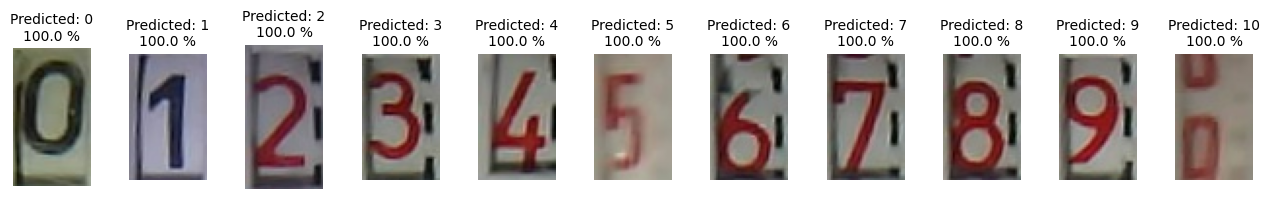

In [5]:
fig, axs = plt.subplots(1, len(images), figsize=(16, 4))
for i in range(len(images)):
    ax = axs[i]
    ax.axis("off")
    ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    ax.set_title("Predicted: %d\n%.1f %%" % (predictions[i], 1e2 * confidences[i]), size=10)
fig.subplots_adjust(wspace=0.5)